## K-means

K-means is an unsupervised clustering algorithm that aims to partition a dataset into a predefined number (k) of clusters. It achieves this by iteratively assigning each data point to the cluster with the nearest centroid (the mean of all points in the cluster) and then recalculating the centroids. This process continues until some stopping condition is met, such as  the assignments no longer change, a maximum number of iterations is reached, cost function (distortion) stops decreasing or decrease less than a threshold.

### Data

In [1]:
from sklearn.datasets import make_blobs

In [2]:
# three clusters
k = 3

X, y = make_blobs(n_samples=300, centers=k, n_features=2, random_state=42)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0.5, 0, 'Feature 1'), Text(0, 0.5, 'Feature 2')]

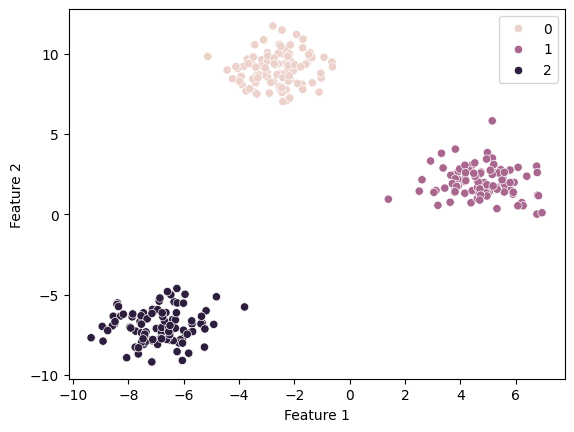

In [4]:
# visualize the data
ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
ax.set(xlabel="Feature 1", ylabel="Feature 2")

### Implementation in NumPy

In [5]:
import numpy as np

In [6]:
# scale the data
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [8]:
def kmeans(X, k, max_iter=100, tolerance=1e-3):
    n_samples = X.shape[0]
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    prev_distorion = None

    for iter in range(max_iter):
        # calcluate distances using broadcasting
        distances = np.sqrt(
            np.sum(
                np.square(np.expand_dims(X, axis=1) - np.expand_dims(centroids, 0)),
                axis=-1,
            )
        )

        # assign each point to its closest cluster
        clusters = np.argmin(distances, axis=1)

        # update centroids
        for cluster in range(k):
            new_centroid = np.mean(X[clusters == cluster], axis=0)
            centroids[cluster] = new_centroid

        # check for stopping condition based on sum of squared distances
        distortion = np.sum(np.square(np.min(distances, axis=1)))

        if prev_distorion is not None and prev_distorion - distortion < tolerance:
            print(f"Stopped at iteration {iter+1}")
            break

        # update distortion
        prev_distorion = distortion

    return clusters, centroids, distortion

In [9]:
clusters, centroids, distortion = kmeans(X_scaled, k)

Stopped at iteration 4


[Text(0.5, 1.0, 'K-means clusters'),
 Text(0.5, 0, 'Feature 1'),
 Text(0, 0.5, 'Feature 2')]

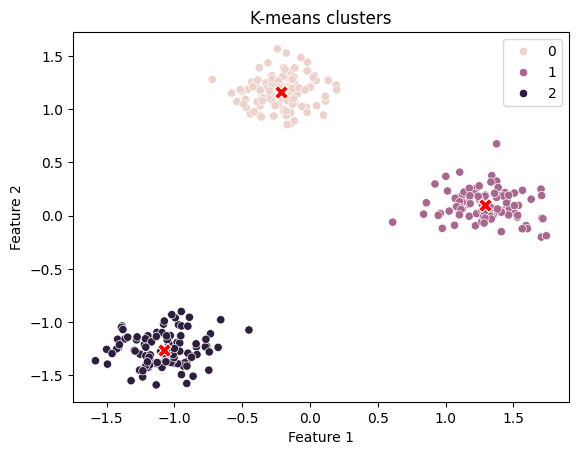

In [10]:
# visualize the K-means clusters
ax = sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters)
ax = sns.scatterplot(
    x=centroids[:, 0], y=centroids[:, 1], color="r", s=100, marker="X", ax=ax
)
ax.set(title="K-means clusters", xlabel="Feature 1", ylabel="Feature 2")

In [11]:
# elbow
num_k = 10

distortions = np.empty(num_k)

for k in range(1, num_k + 1):
    _, _, distortion = kmeans(X_scaled, k)
    distortions[k - 1] = distortion

distortions

Stopped at iteration 3
Stopped at iteration 3
Stopped at iteration 8
Stopped at iteration 5
Stopped at iteration 7
Stopped at iteration 10
Stopped at iteration 13
Stopped at iteration 11
Stopped at iteration 16
Stopped at iteration 11


array([600.        , 187.79991946,  18.26315933,  16.24690574,
        12.71542981,  13.64132852,  11.57196089,  10.46427352,
         8.23404838,   8.49870066])

[Text(0.5, 1.0, 'Elbow Method'), Text(0.5, 0, 'K'), Text(0, 0.5, 'Distorion')]

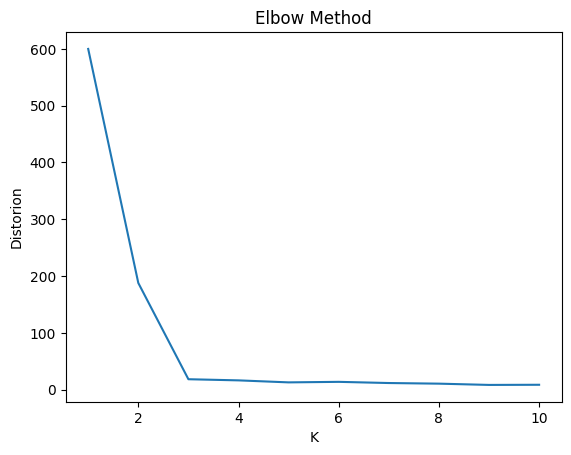

In [12]:
ax = sns.lineplot(x=np.arange(1, num_k + 1), y=distortions)
ax.set(title="Elbow Method", xlabel="K", ylabel="Distorion")